<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Chile_Tasa_Fallecidos_por_Region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto4/2020-04-14-CasosConfirmados-totalRegional.csv', index_col='Region')

In [23]:
data_raw

,Casos nuevos,Casos totales,% Casos totales**,Fallecidos
Region,,,,
Arica y Parinacota,5,120,1.52 %,1
Tarapaca,10,62,0.78 %,0
Antofagasta,6,155,1.96 %,1
Atacama,0,13,0.16 %,0
Coquimbo,0,66,0.83 %,0
Valparaiso,12,285,3.60 %,2
Metropolitana,283,4086,51.61 %,40
O'Higgins,5,53,0.67 %,0
Maule,1,142,1.79 %,4


In [21]:
data_raw

,Casos nuevos,Casos totales,% Casos totales**,Fallecidos
Region,,,,
Arica y Parinacota,0,115,1.53 %,1
Tarapaca,6,52,0.69 %,0
Antofagasta,11,149,1.98 %,1
Atacama,0,13,0.17 %,0
Coquimbo,0,66,0.88 %,0
Valparaiso,19,273,3.63 %,2
Metropolitana,204,3803,50.54 %,36
O'Higgins,2,48,0.64 %,0
Maule,3,141,1.87 %,3


In [0]:
tests_raw = pd.read_csv(
    'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv',
    index_col='Region')
tests_raw = tests_raw.fillna(0)

In [0]:
tests_total = pd.Series(dtype='float64')
for date in tests_raw.columns:
  tests_raw[date] = tests_raw[date].apply(lambda x: 0 if x=='-' else x)
  tests_raw[date] = tests_raw[date].astype(int)
  tests_total[date] = np.sum(tests_raw[date])

In [0]:
tests_raw.loc['Total'] = tests_total

In [8]:
tests_raw['Poblacion']

Region
Arica y Parinacota                             252110
Tarapaca                                       382773
Antofagasta                                    691854
Atacama                                        314709
Coquimbo                                       836096
Valparaiso                                    1960170
Metropolitana                                 8125072
Del Libertador General Bernardo O’Higgins      991063
Maule                                         1131939
Nuble                                          511551
Biobio                                        1663696
La Araucania                                  1014343
Los Rios                                       405835
Los Lagos                                      891440
Aysen                                          107297
Magallanes y la Antartica                      178362
Total                                        19458310
Name: Poblacion, dtype: int64

In [0]:
death_rate = 1000000*data_raw['Fallecidos']/tests_raw['Poblacion'].values

In [0]:
death_rate = death_rate.sort_values(ascending=True)

In [0]:
death_rate = death_rate[death_rate>0]

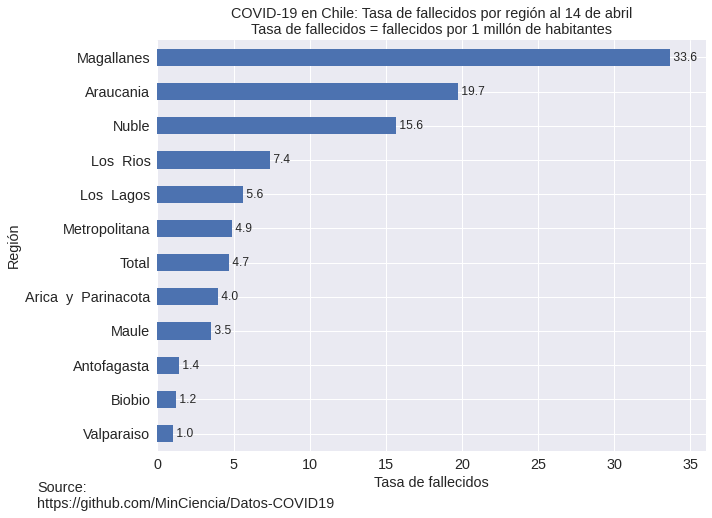

In [18]:
fig, ax = plt.subplots(figsize=(10,7))
death_rate.plot(kind='barh', ax=ax, color='C0', fontsize='x-large')
for i, val in enumerate(death_rate):
  ax.text(val, i-0.1, f" {val:.1f}", fontsize='large')
ax.set_title(f'COVID-19 en Chile: Tasa de fallecidos por región al 14 de abril\nTasa de fallecidos = fallecidos por 1 millón de habitantes', fontsize='x-large')
ax.set_xlabel(f'Tasa de fallecidos', fontsize='x-large')
ax.set_ylabel(f'Región', fontsize='x-large')
plt.xlim(0,36)
fig.tight_layout()
plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-120,-30), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig("2020-04-15-COVID-19-Chile-Tasa-de-Fallecidos-por-Region.png", format='png', bbox_inches='tight', dvi=1200)

In [0]:
from google.colab import files
files.download("2020-04-15-COVID-19-Chile-Tasa-de-Fallecidos-por-Region.png")

In [0]:
CFR = data_raw['Fallecidos']/data_raw['Casos  totales']*100

In [0]:
CFR = CFR.sort_values(ascending=True)

In [0]:
CFR = CFR[CFR>0]

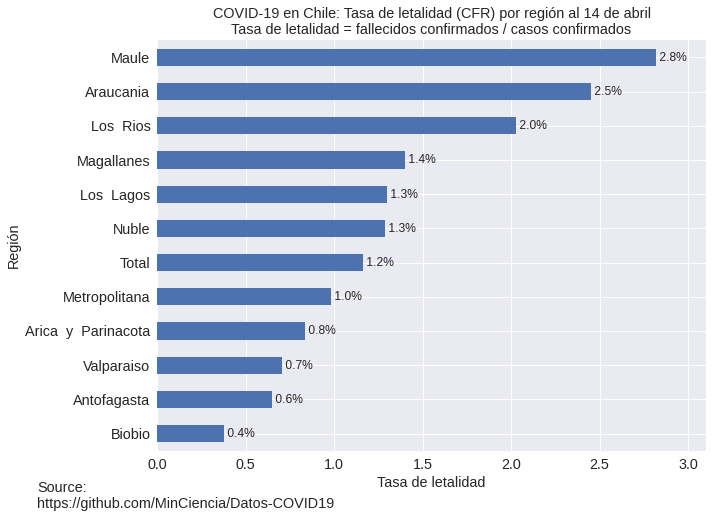

In [34]:
fig, ax = plt.subplots(figsize=(10,7))
CFR.plot(kind='barh', ax=ax, color='C0', fontsize='x-large')
for i, val in enumerate(CFR):
  ax.text(val, i-0.1, f" {val:.1f}%", fontsize='large')
ax.set_title(f'COVID-19 en Chile: Tasa de letalidad (CFR) por región al 14 de abril\nTasa de letalidad = fallecidos confirmados / casos confirmados', fontsize='x-large')
ax.set_xlabel(f'Tasa de letalidad', fontsize='x-large')
ax.set_ylabel(f'Región', fontsize='x-large')
plt.xlim(0,3.1)
fig.tight_layout()
plt.annotate('Source:\nhttps://github.com/MinCiencia/Datos-COVID19', (0,0), (-120,-30), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig("2020-04-15-COVID-19-Chile-Tasa-de-Letalidad-por-Region.png", format='png', bbox_inches='tight', dvi=1200)

In [0]:
from google.colab import files
files.download("2020-04-15-COVID-19-Chile-Tasa-de-Letalidad-por-Region.png")